#  Seattle and San Francisco crime analysis

### Research plan:
* eyeball the data to understand datasets structure
* data preparation
* compare crime rates over time
* compare most occuring crimes

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

### Let's load the data into pandas DataFrames and inspect it's structure

In [43]:
df_seattle = pd.read_csv('seattle_incidents_summer_2014.csv',low_memory=False)
df_seattle['Time Reported'] = pd.to_datetime(df_seattle['Date Reported'])
df_seattle['Date'] = df_seattle['Time Reported'].values.astype('<M8[D]')
df_seattle.head(3)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Time Reported,Date
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,...,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,2015-06-28 10:31:00,2015-06-28
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,...,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014,2015-06-24 11:09:00,2015-06-24
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,...,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014,2015-06-22 09:22:00,2015-06-22


In [44]:
df_sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates=True, infer_datetime_format=True)
df_sf['Date'] = pd.to_datetime(df_sf['Date'])
df_sf.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,2014-08-31,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,2014-08-31,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244


In [45]:
print('\t Seattle \t\t\t San Francisco')
seattle_crimes = list(df_seattle['Summarized Offense Description'].unique())
sf_crimes = list(df_sf['Category'].unique())
for i in range(max(len(seattle_crimes), len(sf_crimes) )):
    c1, c2 ='', ''
    if i < len(seattle_crimes):
        c1 = seattle_crimes[i]
    if i < len(sf_crimes):        
        c2 = sf_crimes[i]
    print(c1 +'\t\t\t\t'+ c2)


	 Seattle 			 San Francisco
BURGLARY				ARSON
FRAUD				NON-CRIMINAL
MAIL THEFT				LARCENY/THEFT
COUNTERFEIT				DRUG/NARCOTIC
OTHER PROPERTY				DRIVING UNDER THE INFLUENCE
EMBEZZLE				OTHER OFFENSES
CAR PROWL				TRESPASS
THREATS				VEHICLE THEFT
PROPERTY DAMAGE				ASSAULT
LOST PROPERTY				FRAUD
FORGERY				SUSPICIOUS OCC
VEHICLE THEFT				SECONDARY CODES
BURGLARY-SECURE PARKING-RES				WEAPON LAWS
PICKPOCKET				MISSING PERSON
BIKE THEFT				WARRANTS
NARCOTICS				ROBBERY
DISPUTE				DRUNKENNESS
ASSAULT				PROSTITUTION
STOLEN PROPERTY				LIQUOR LAWS
WARRANT ARREST				KIDNAPPING
TRAFFIC				FAMILY OFFENSES
SHOPLIFTING				LOITERING
DISTURBANCE				DISORDERLY CONDUCT
VIOLATION OF COURT ORDER				FORGERY/COUNTERFEITING
ILLEGAL DUMPING				EMBEZZLEMENT
PROSTITUTION				BURGLARY
ROBBERY				SUICIDE
TRESPASS				VANDALISM
LIQUOR VIOLATION				STOLEN PROPERTY
BIAS INCIDENT				RUNAWAY
THEFT OF SERVICES				GAMBLING
HOMICIDE				EXTORTION
RECOVERED PROPERTY				PORNOGRAPHY/OBSCENE MAT
OBSTRUCT				BRIBERY
RECKLESS 

### Observations so far:

We had a look on data files seattle_incidents_summer_2014.csv and sanfrancisco_incidents_summer_2014.csv, and listed all crime categories used in the files.

Overall structure of data files is different, main similarities are:
- timestamps are present in both sets, we can use those to depict weekly crime fluctuations and day vs night patterns
- City zones are present for Seattle, districts present for San Fransisco, so it is possible to analyse crimes by district e.g. display most frequent crime types per district/zone.

Crime taxonomies used in our data sets do not match. Theoretically, it is possible to aggregate existing categories into criminal/non-criminal meta-categories, and start comparison from there, but that requires domain knowledge on US criminal legislation and potentially is a big research. 


## Let's start with a broad question - Which city is safer?

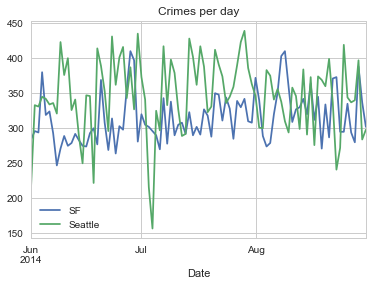

In [46]:
df_sf.groupby('Date')['IncidntNum'].count().plot(label = 'SF')
df_seattle[df_seattle['Date'] < datetime.date(2014, 9, 1)].\
groupby('Date')['General Offense Number'].count().plot(label = 'Seattle')
plt.title('Crimes per day')
plt.legend()

Above is a chart depicting daily number of crimes. We can tell that number of crimes in both cities are comparable, which is slightly surprising, since we did not adjust numbers by population number.

According to wikipedia Seattle population is 608,660, San Fransisco population is 870,887. Therefore, San Fransisco population is 1,43 times bigger than Seattle one.

Below is visualization for 7 day moving average, for Crimes per capita for both cities.

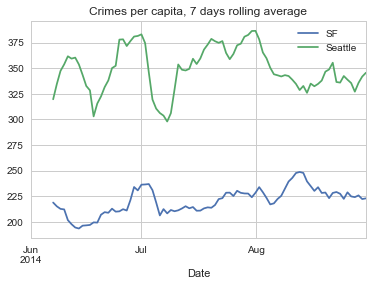

In [47]:
sf_grouped = (df_sf.groupby('Date')['IncidntNum'].count()/1.43)
sf_grouped.rolling(7).mean().plot(label = 'SF')
seatlle_grouped = df_seattle[df_seattle['Date'] < datetime.date(2014, 9, 1)].groupby('Date')['General Offense Number'].count()
seatlle_grouped.rolling(7).mean().plot(label = 'Seattle')
plt.legend()
plt.title('Crimes per capita, 7 days rolling average')

At this point we can conclude that San Fransisco is significantly safer in terms of number of crimes per capita, although let's try to judge on crimes severety. 

In order to do that we will list top 10 most occuring crime categories for the cities in our research, also let's normalize total occurences per capita.

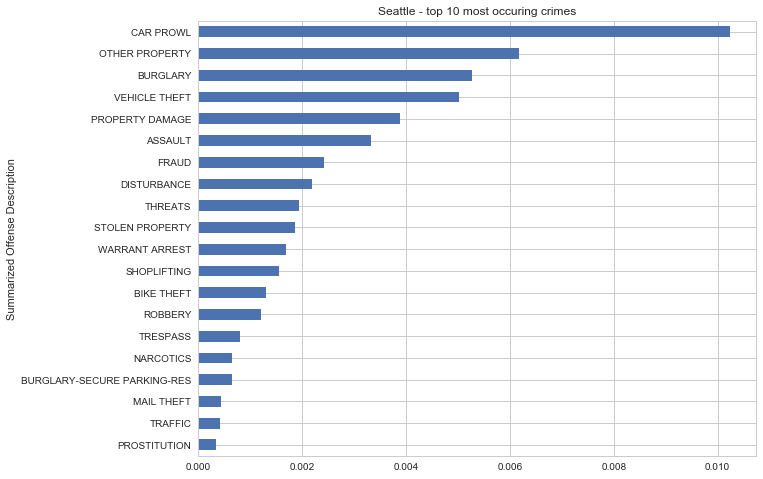

In [55]:
top10_seattle = df_seattle.groupby('Summarized Offense Description')['RMS CDW ID'].count().sort_values().tail(20)/608660
fig, ax = plt.subplots(figsize = (10, 8))
top10_seattle.plot(kind = 'barh', ax = ax)
plt.title('Seattle - top 10 most occuring crimes')

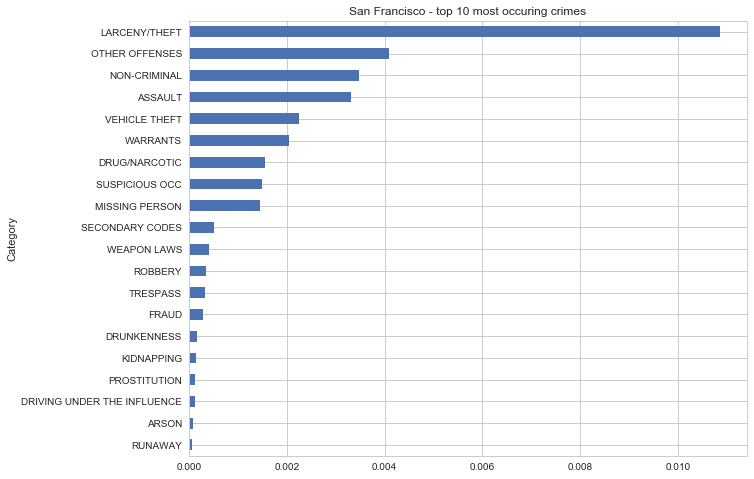

In [56]:
top10_sf = df_sf.groupby('Category')['IncidntNum'].count().sort_values().tail(20)/870887
fig, ax = plt.subplots(figsize = (10, 8))
top10_sf.plot(kind = 'barh', ax = ax)
plt.title('San Francisco - top 10 most occuring crimes')

### Conclusions at this stage:

Overall, San Francisco has less theft related crimes, and we can conclude it is safer than Seattle. Furthermore, assuming that categories with the same names match, we can conclude: 
- it is two times more likely to be involved into vechicle theft in Seattle than SF
- chances to be assaulted are roughly the same in both cities
- number of narcotics crimes are two times larger in San Fransisco


 ### Directions for further investigation:
 
* break down by crime type and destrict/sector
* day vs night, and fluctuations depending on week days
* crime severity (unify types into criminal-non-criminal)
* top 10 safest districts (to get meaningful results we need to decode districts codes and find out population density per district)